In [2]:
import pandas as pd

# Load dataset
from google.colab import files
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/house.csv")

# Display basic information
print(df.head())
print(df.info())


Saving house.csv to house.csv
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     

In [ ]:
# Handle missing values
df = df.dropna()

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

# Update numerical_features with the correct column names from your DataFrame
numerical_features = ['price', 'total_sqft', 'size']  # Replace 'size' with the most relevant column

# Assuming 'total_sqft' has values like "2100 - 2850", extract the average:
# If it's 'price' column, adjust accordingly
import numpy as np

def extract_avg_sqft(sqft_str):
    try:
        # Handle cases with single values (e.g., 1200)
        return float(sqft_str)
    except ValueError:
        # Handle cases with ranges (e.g., 2100 - 2850)
        if "-" in sqft_str:
            lower, upper = map(float, sqft_str.split(" - "))
            return (lower + upper) / 2
        else:
            # Handle other cases, like unknown strings, with nan values
            return np.nan

df['total_sqft'] = df['total_sqft'].apply(extract_avg_sqft)


# Extract numerical values from the 'size' column
# For example, if 'size' contains values like "2 BHK", you can extract the number:
df['num_rooms'] = df['size'].str.extract('(\d+)').astype(float)

# Update numerical_features to include 'num_rooms' and exclude 'size'
numerical_features = ['price', 'total_sqft', 'num_rooms']

# Check for correct column names (Optional, but recommended for debugging)
print(df.columns)

# Select only numerical features that are present in the dataframe
existing_features = [col for col in numerical_features if col in df.columns]

# Check if any expected columns are missing
missing_features = [col for col in numerical_features if col not in df.columns]
if missing_features:
    print(f"Warning: Columns not found in the DataFrame: {missing_features}")

scaler = MinMaxScaler()

# Scale only the existing features
if existing_features:  # proceed with scaling only if there are existing features
    df[existing_features] = scaler.fit_transform(df[existing_features])

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'num_rooms'],
      dtype='object')


<ipython-input-6-ad28d98b9d5c>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].apply(extract_avg_sqft)
<ipython-input-6-ad28d98b9d5c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_rooms'] = df['size'].str.extract('(\d+)').astype(float)
<ipython-input-6-ad28d98b9d5c>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

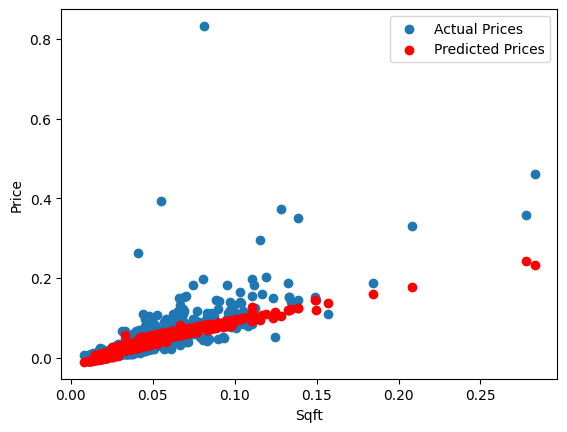

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target
# 'total_sqft' is the correct column name, not 'sqft'
X = df[['total_sqft', 'num_rooms']]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices
predictions = model.predict(X_test)

# Show results
import matplotlib.pyplot as plt
# Use 'total_sqft' for plotting as well
plt.scatter(X_test['total_sqft'], y_test, label="Actual Prices")
plt.scatter(X_test['total_sqft'], predictions, label="Predicted Prices", color='red')
plt.xlabel("Sqft")
plt.ylabel("Price")
plt.legend()
plt.show()